### 1. Importing necessary libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from utils.utils import plot_confusion_matrix, split_data

### 2. Loading the dataset

In [19]:
#load dataset
dataset = pd.read_csv('../dataset/dataset_final.csv')

# refactor values in filepath column added ../ to the path
dataset['Filepath'] = dataset['Filepath'].apply(lambda x: '../' + x)

dataset.head()

,Filepath,Label
0,../dataset/Positive/07045.jpg,POSITIVE
1,../dataset/Positive/09452.jpg,POSITIVE
2,../dataset/Positive/19030_1.jpg,POSITIVE
3,../dataset/Negative/06463.jpg,NEGATIVE
4,../dataset/Positive/12625_1.jpg,POSITIVE


### 3. Preparing the images

In [20]:
train_df, test_df = train_test_split(
    dataset.sample(frac=1.0, random_state=42),
    train_size=0.80,
    random_state=42
)

preprocess_input = tf.keras.applications.resnet.preprocess_input

In [21]:
train_data, valid_data, test_data = split_data(train_df, test_df, image_channels=1, preprocess_input=preprocess_input)

Found 25600 validated image filenames belonging to 2 classes.
Found 6400 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.


### 4. Loading the ResNet50 model

In [22]:
model = tf.keras.models.load_model('./models/trained/resnet50_model.h5')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 233, 233, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 114, 114, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 114, 114, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

### 5. Making predictions

In [23]:
y_pred = np.argmax(model.predict(test_data), axis=1)

250/250 [==============================] - 180s 718ms/step


In [24]:
x = f1_score(y_true=test_data.labels, y_pred=y_pred)
y = precision_score(y_true=test_data.labels, y_pred=y_pred)
z = recall_score(y_true=test_data.labels, y_pred=y_pred)

In [25]:
print(f'F1 Score: {round(x*100,2)}%')
print(f'Precision Score: {round(y*100,2)}%')
print(f'Recall Score: {round(z*100,2)}%')

F1 Score: 99.94%
Precision Score: 99.93%
Recall Score: 99.95%


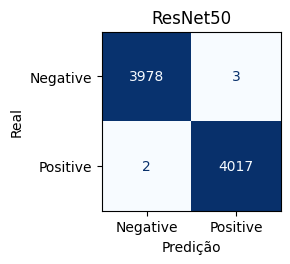

In [26]:
disp = plot_confusion_matrix(test_data.labels, y_pred, title = 'ResNet50')

plt.show()

In [27]:
# disp.figure_.savefig('./models/figures/resnet50/resnet50_confusion_matrix.eps')
# disp.figure_.savefig('./models/figures/resnet50/resnet50_confusion_matrix.png')

### 6. Evaluating the model

In [28]:
loss, acc = model.evaluate(test_data)

250/250 [==============================] - 179s 714ms/step - loss: 0.0040 - accuracy: 0.9994


In [29]:
print(f'acc: {round(acc*100,2)}%')
print(f'loss: {loss}' )

acc: 99.94%
loss: 0.00395544758066535


In [30]:
import pickle

# loading model's history
with open('./models/historys/resnet50_model_history', 'rb') as f:
    history = pickle.load(f)

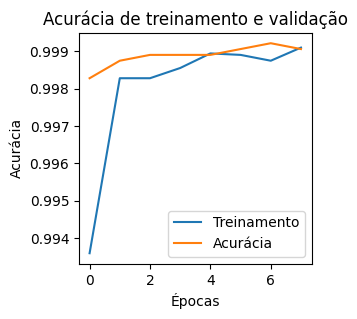

In [31]:
plt.figure(figsize = (3, 3))

# plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Acurácia de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend(["Treinamento", "Acurácia"])

# plt.subplot(1, 2, 2)
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.title("Perda de treinamento e validação")
# plt.xlabel("Épocas")
# plt.ylabel("Perda")
# plt.legend(["Treinamento", "Validação"])


plt.show()